In [ ]:
# Thomas Buchholz

## Research question/interests

I will be taking a look at the decklists we have collected. More specifically, I will be looking at what the average deck is made of and how it compares to the decks that are winning tournaments. Some particular fields of interest are the average mana value of a decklist, what is the most common deck color, and how many lands does the average deck use.
.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import thomas
import seaborn as sns

decklists = pd.read_json("https://us-central1-tumbledmtg-website.cloudfunctions.net/api/decklists")

,stars,cards,lands,mv,white,blue,red,black,green
129,2,4;TBLD Binding Mummy\n4;TBLD Mummy Paramount\n...,22,2.145833,0.382022,0.000000,0.617978,0.000000,0.000000
92,2,4;TBLD Faerie Miscreant\n4;TBLD Eye Collector\...,22,2.346939,0.000000,0.553571,0.446429,0.000000,0.000000
35,2,4;TBLD Mox Bismuth\n4;TBLD Capricious Idol\n4;...,19,0.785714,0.655172,0.137931,0.000000,0.172414,0.034483
85,2,4;TBLD Bone Miser\n3;TBLD Grave Scrabbler\n2;T...,24,2.823529,0.000000,0.000000,0.781818,0.218182,0.000000
52,1,4;TBLD Seagraf Skaab\n3;TBLD Armored Skaab\n4;...,24,2.392157,0.000000,0.411765,0.588235,0.000000,0.000000
127,1,2;TBLD Pristine Talisman\n2;TBLD Beholder of A...,24,3.215686,0.017094,0.504274,0.247863,0.230769,0.000000
58,1,4;TBLD Happy Paddler\n4;TBLD Merfolk Trickster...,21,1.796296,0.000000,0.784314,0.000000,0.000000,0.215686
24,1,4;TBLD Sorin Vampire Bloodlord\n3;TBLD Pesky C...,24,2.960784,0.000000,0.000000,1.000000,0.000000,0.000000
96,1,3;TBLD Artisans Fountain\n3;TBLD Sunblade Ange...,24,3.893617,0.588235,0.411765,0.000000,0.000000,0.000000
91,1,4;TBLD Bloodforged Battle-Axe\n2;TBLD Goldvein...,16,1.563636,1.000000,0.000000,0.000000,0.000000,0.000000


(0.0, 1.0)

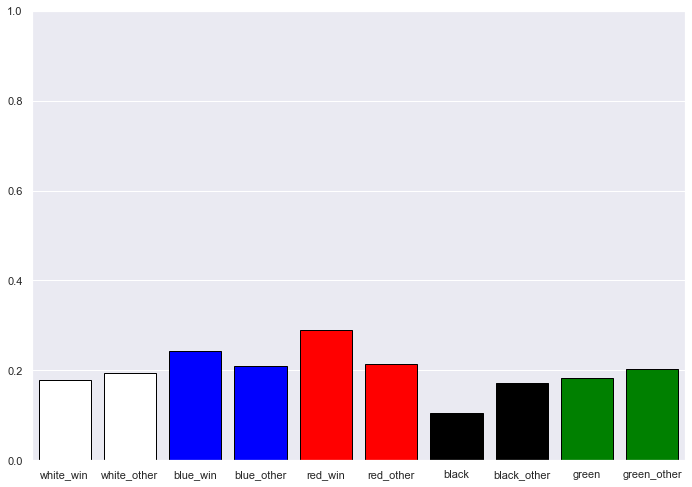

In [57]:
decklists = thomas.clean_decklists(decklists)
winner_decklists = decklists.loc[lambda x: x['stars'] > 0]
other_decklists = decklists.loc[lambda x: x['stars'] == 0]
winner_decklists




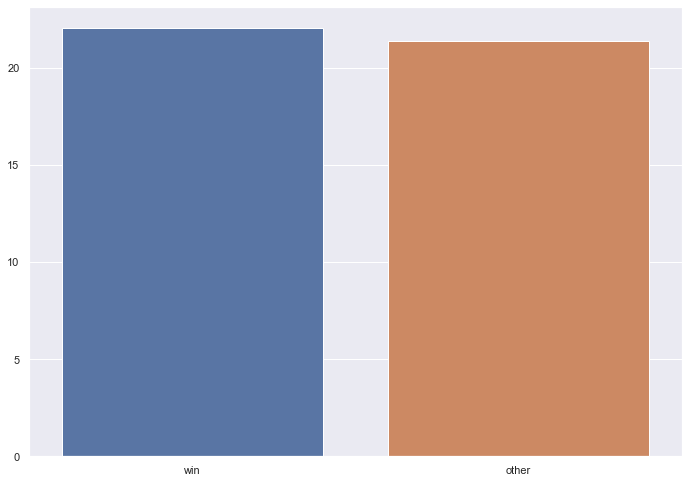

In [58]:
import math
colors = ["white","blue","red","black","green"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
def get_frame(decklist1, decklist2):
    return pd.DataFrame.from_dict({
        "white_win": [decklist1['white'].sum()/len(decklist1.index)],
        "white_other": [decklist2['white'].sum()/len(decklist2.index)],
        "blue_win":  [decklist1['blue'].sum()/len(decklist1.index)],
        "blue_other":  [decklist2['blue'].sum()/len(decklist2.index)],
        "red_win": [decklist1['red'].sum()/len(decklist1.index)],
        "red_other": [decklist2['red'].sum()/len(decklist2.index)],
        "black": [decklist1['black'].sum()/len(decklist1.index)],
        "black_other": [decklist2['black'].sum()/len(decklist2.index)],
        "green": [decklist1['green'].sum()/len(decklist1.index)],
        "green_other": [decklist2['green'].sum()/len(decklist2.index)],
    })

win = get_frame(winner_decklists, other_decklists)
plot = sns.barplot(data=win )
for i, bar in enumerate(plot.patches):
    num = math.floor(i/2)
    bar.set_color(colors[num])
    bar.set_edgecolor("black")
plot.set_ylim([0,1])

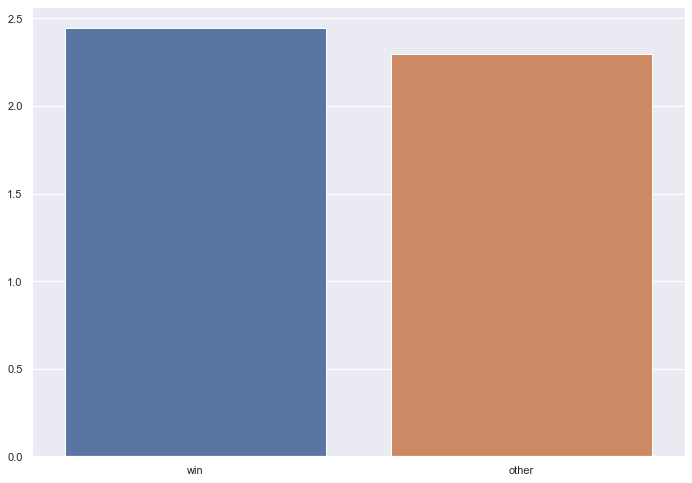

In [59]:
lands = pd.DataFrame.from_dict({
    "win": [winner_decklists['lands'].sum()/len(winner_decklists.index)], 
    "other": [other_decklists['lands'].sum()/len(other_decklists.index)]
})
plot = sns.barplot(data=lands)

In [ ]:
mv = pd.DataFrame.from_dict({
    "win": [winner_decklists['mv'].sum()/len(winner_decklists.index)], 
    "other": [other_decklists['mv'].sum()/len(other_decklists.index)]
})
plot = sns.barplot(data=mv)